# IMPORTING IMPORTANT LIBRARIES

In [52]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from  sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score,roc_auc_score,roc_curve
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt

# READING THE CSV FILE

In [5]:
ln_df=pd.read_csv("loan_status.csv")
ln_df.isnull().sum()
ln_df.shape

(614, 13)

# REMOVING UNWANTED COLUMNS

In [6]:
#non_sence columns
non_sence=[]
for col in ln_df:
    if len(ln_df[col].value_counts())==1 or len(ln_df[col].value_counts())==ln_df.shape[0]:
        non_sence.append(col)
        
non_sence
ln_df.drop(columns=["Loan_ID"],inplace=True)

# SPLITTING DATA FOR INPUT AND OUTPUT

In [7]:
y=ln_df["Loan_Status"]
ln_df.drop(columns=["Loan_Status"],inplace=True)

# SPLITTING DATA INTO TRAIN TEST SPLIT

In [8]:
x_train,x_test,y_train,y_test=train_test_split(ln_df,y,test_size=0.20,random_state=43)

# FILLING MISSING VALUES FOR CONTINUOUS AND CATEGORICAL COLUMNS

In [9]:
## filling missing values for cont and cat
for col in x_train:
    if x_train[col].dtype=="int64" or x_train[col].dtype=="float64":
        x_train[col].fillna(x_train[col].mean(),inplace=True)
        x_test[col].fillna(x_train[col].mean(),inplace=True)
        
## filling missing values for cat columns
for col in x_train:
    if x_train[col].dtype=="object":
        x_train[col].fillna(x_train[col].mode()[0],inplace=True)
        x_test[col].fillna(x_train[col].mode()[0],inplace=True)

# SCALING CONTINUOUS COLUMNS

In [10]:
## scaling cont columns
scaler=StandardScaler()
cont=[i for i in x_train if x_train[i].dtype=="int64" or x_train[i].dtype=="float64"]
for col in cont:
    x_train[col]=scaler.fit_transform(np.array(x_train[col]).reshape(-1,1))
    x_test[col]=scaler.transform(np.array(x_test[col]).reshape(-1,1))

In [11]:
x_train["Dependents"]=x_train["Dependents"].replace("3+",4)
x_test["Dependents"]=x_test["Dependents"].replace("3+",4)

In [12]:
x_train["Dependents"]=x_test["Dependents"].astype("int64")

# ONE HOT EN_CODING  FOR CATEGORICAL COLUMNS

In [13]:

cat=[i for i in x_train if x_train[i].dtype=="object"]
oe_train=pd.get_dummies(x_train[cat])
oe_test=pd.get_dummies(x_test[cat])

In [14]:

oe_trains,oe_tests=oe_train.align(oe_test,join="inner",axis=1)

In [15]:
final_train=pd.concat([x_train[cont],oe_trains],axis=1)
final_test=pd.concat([x_test[cont],oe_tests],axis=1)

# BUILDING LOGISTIC REGRESSION MODEL

In [16]:
logreg=LogisticRegression()
logreg.fit(final_train,y_train)
test_pred=logreg.predict(final_test)
test_pred


array(['Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'N'], dtype=object)

In [17]:
### test accuracy
accuracy_score(test_pred,y_test)

0.8048780487804879

In [18]:
### train accuracy
train_pred=logreg.predict(final_train)
accuracy_score(train_pred,y_train)

0.8126272912423625

In [19]:
## confusion_matrix
confusion_matrix(test_pred,y_test)

array([[17,  3],
       [21, 82]], dtype=int64)

In [20]:
# recall score
recall_score(test_pred,y_test,pos_label="Y")

0.7961165048543689

In [21]:
# precession score
precision_score(test_pred,y_test,pos_label="Y")

0.9647058823529412

In [22]:
# f1 score
f1_score(test_pred,y_test,pos_label="Y")

0.8723404255319148

In [55]:
# roc auc score
pos_probs=logreg.predict_proba(final_test)[::,1]
fpr,tpr,threshold=roc_curve(y_test,pos_probs,pos_label="Y")
roc_auc_score(y_test,pos_probs)

0.7071207430340557

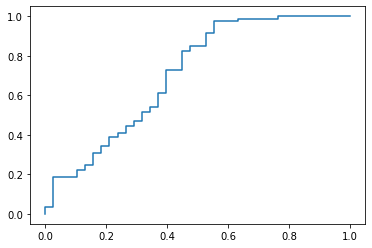

In [56]:
# roc curve
plt.plot(fpr,tpr)

# checking for multy colinarity

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [24]:
vic=[variance_inflation_factor(final_train.values,i) for i in  range(final_train.shape[1])]

In [25]:
vic

[1.7521623486274907,
 1.2159218115950274,
 1.855134787989563,
 1.0487424704905042,
 1.0146256134972302,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf]